# Life Expectancy
#### After testing with some datasets from kaggle i decided to build my own dataset.
The data from kaggle was rubbish, not scaled right, incomprehensible, and most of the time it looked made-up.  
The dataset i build contains:
 - Life expectancy
 - Education
 - GDP
 - BMI
 - happiness?
 - criminaliteit?
 - alcohol/drugs?
 - avg healtcare?
   
All This data is collected from:
 - data.world
 - worldbank.org
 - who.int

 

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data exploration
I will explore each dataset separately and merge them all in the end.

## First dataset: Life Expectancy
this set contains the Life expectancy at birth in years per year

In [2]:
df_le = pd.read_csv('DATA/Life_expectancy.csv', skiprows=4)

In [3]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            235 non-null    float64
 5   1961            236 non-null    float64
 6   1962            236 non-null    float64
 7   1963            235 non-null    float64
 8   1964            235 non-null    float64
 9   1965            236 non-null    float64
 10  1966            236 non-null    float64
 11  1967            236 non-null    float64
 12  1968            236 non-null    float64
 13  1969            236 non-null    float64
 14  1970            237 non-null    float64
 15  1971            236 non-null    float64
 16  1972            236 non-null    float64
 17  1973            237 non-null    flo

I will drop the rows for 2019 and 2020 because they are completely empty.  
I will drop the columns of Indicator Name and Indicator Code to becous the don't have any significant value.

In [4]:
df_le.drop(["2019", "2020", 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [5]:
df_le = df_le.melt(id_vars=["Country Code", 'Country Name'])
df_le.rename(columns={'variable': 'Year', 'Country Name': 'Country', 'value': 'Life Expectancy'}, inplace=True)

In [6]:
df_le.head()

,Country Code,Country,Year,Life Expectancy
0,ABW,Aruba,1960,65.662
1,AFG,Afghanistan,1960,32.446
2,AGO,Angola,1960,37.524
3,ALB,Albania,1960,62.283
4,AND,Andorra,1960,NaN


In [7]:
df_wld = df_le[df_le['Country Code']=='WLD']
df_wld

,Country Code,Country,Year,Life Expectancy
257,WLD,World,1960,52.578367
521,WLD,World,1961,53.079543
785,WLD,World,1962,53.496798
1049,WLD,World,1963,54.022024
1313,WLD,World,1964,54.691923
1577,WLD,World,1965,55.351110
1841,WLD,World,1966,56.082618
2105,WLD,World,1967,56.787325
2369,WLD,World,1968,57.386476
2633,WLD,World,1969,57.995668


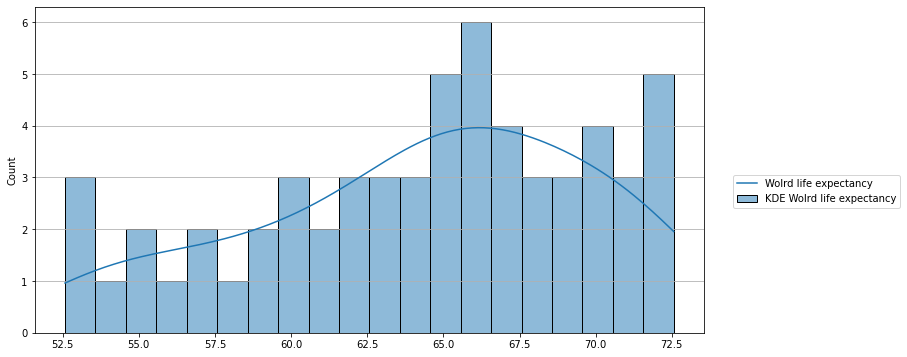

In [8]:


plt.figure(figsize=(12,6))
sns.histplot(df_wld, bins=20, kde=True)
plt.legend(labels=['Wolrd life expectancy','KDE Wolrd life expectancy'], bbox_to_anchor=(1.3, 0.5))
plt.grid(axis='y')

In [9]:
df_le.isnull().values.ravel().sum()

1331

There are 1331 empty values in the Life Expectancy column.  
After all the data is explored and merged we will deal with this.

## Second dataset: Education
This dataset shows 4 different mesurmenst of education in a country:
- Government expenditure on education as % of GDP (%)
- Gross enrolment ratio, primary, female (%)
- Gross enrolment ratio, primary, gender parity index (GPI)
- Out-of-school children of primary school age, both sexes (number)

In [10]:
df_edu = pd.read_csv('DATA/Education.csv', skipfooter=5, engine='python')

In [11]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ï»¿Country Name  1072 non-null   object
 1   Series           1072 non-null   object
 2   1987             1072 non-null   object
 3   1988             1072 non-null   object
 4   1989             1072 non-null   object
 5   1990             1072 non-null   object
 6   1991             1072 non-null   object
 7   1992             1072 non-null   object
 8   1993             1072 non-null   object
 9   1994             1072 non-null   object
 10  1995             1072 non-null   object
 11  1996             1072 non-null   object
 12  1997             1072 non-null   object
 13  1998             1072 non-null   object
 14  1999             1072 non-null   object
 15  2000             1072 non-null   object
 16  2001             1072 non-null   object
 17  2002             1072 non-null   

In [12]:
df_edu = df_edu.melt(id_vars=["ï»¿Country Name", 'Series'])

In [14]:
df_edu.rename(columns={'variable': 'Year', 'ï»¿Country Name': 'Country'}, inplace=True)
df_edu.replace('..',np.NaN, inplace=True)
df_edu['value'] = df_edu['value'].astype(float)
df_edu['Year'] = df_edu['Year'].astype(int)

In [15]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36448 entries, 0 to 36447
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  36448 non-null  object 
 1   Series   36448 non-null  object 
 2   Year     36448 non-null  int32  
 3   value    21335 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 996.8+ KB


In [16]:
df_edu

,Country,Series,Year,value
0,Afghanistan,Government expenditure on education as % of GD...,1987,NaN
1,Afghanistan,"Gross enrolment ratio, primary, female (%)",1987,NaN
2,Afghanistan,"Gross enrolment ratio, primary, gender parity ...",1987,NaN
3,Afghanistan,"Out-of-school children of primary school age, ...",1987,NaN
4,Albania,Government expenditure on education as % of GD...,1987,NaN
...,...,...,...,...
36443,Zambia,"Out-of-school children of primary school age, ...",2020,NaN
36444,Zimbabwe,Government expenditure on education as % of GD...,2020,NaN
36445,Zimbabwe,"Gross enrolment ratio, primary, female (%)",2020,NaN
36446,Zimbabwe,"Gross enrolment ratio, primary, gender parity ...",2020,NaN


In [22]:
df_temp = df_edu[(df_edu['Country']=='World') & (df_edu['Series']=='Gross enrolment ratio, primary, female (%)')]
#df_temp = df_temp[df_temp.Year != 2020]

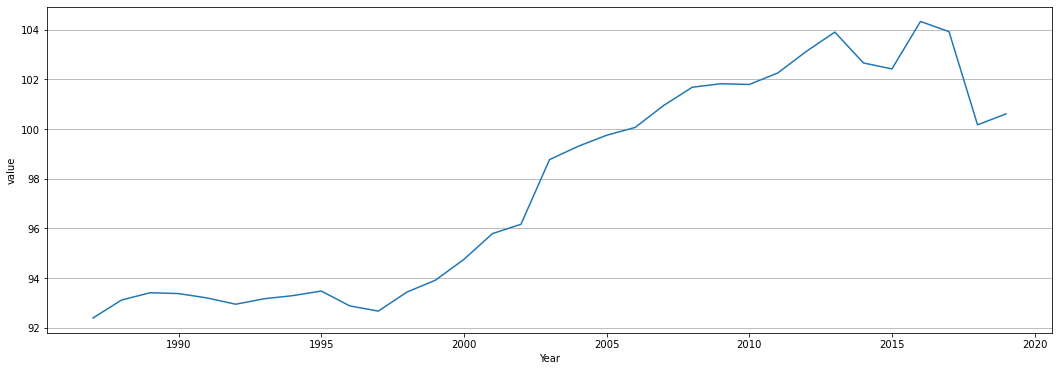

In [23]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_temp, x='Year', y='value', markers=True, dashes=False)
plt.grid(axis='y')